## Load pretrained model on QM9 and predict 

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from IPython.display import Image


In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np
from scannet.models import SCANNet
from utils.general import process_xyz, prepare_input

*** Open Babel Error  in openLib
  /opt/conda/lib/openbabel/3.1.0/png2format.so did not load properly.
 Error: libXau.so.6: cannot open shared object file: No such file or directory


In [4]:
# model path for QM9 property
model_path = '../../data/pretrained_models/qm9/model_lumo.h5'
model_load = SCANNet.load_model_infer(model_path)

In [5]:
print('Model inputs: ', [x.name for x in model_load.inputs])
print('Model outputs: ', [x.name for x in model_load.outputs])

Model inputs:  ['atomic', 'atom_mask', 'neighbors', 'neighbor_mask', 'neighbor_weight', 'neighbor_distance', 'ring_aromatic']
Model outputs:  ['predict_property/BiasAdd:0', 'global_attention/transpose_1:0']


### Predict from xyz files

In [6]:
# Examples for Methylacrylate molecule
name = 'Methylacrylate'
struct = process_xyz('../../data/experiments/molecules/{}.xyz'.format(name))
# Computing Neighbor from Voronoi tessalation with cutoff threshold
ip = prepare_input(struct, use_ring=True,
                   w_t=0.2, d_t=4.0)

energy, ga_scores = model_load.predict(ip)
print("Predicted LUMO (meV): ", energy[0][0])

ga_scores = np.squeeze(ga_scores)
# Showing atom and corresponding global attention score for property
for i in range(len(struct['Atoms'])):
    print(struct['Atoms'][i], ga_scores[i])

# Export prediction result to xyz file for Visualization using Ovito
with open('../visualize/{}_lumo.xyz'.format(name), 'w') as f:
    f.write(str(len(struct['Atoms'])) + '\n')
    f.write('XXX \n')
    for i in range(len(struct['Atoms'])):
        f.write('{}\t{}\t{}\t{}\t{}\n'.format(struct['Atoms'][i], struct['Coords'][i][0],
            struct['Coords'][i][1], struct['Coords'][i][2],
            ga_scores[i]))

Predicted LUMO (meV):  -566.04346
C 0.11376983
C 0.09199407
C 0.10567913
O 0.06767914
O 0.13423431
C 0.056938004
H 0.07394005
H 0.07456286
H 0.06807666
H 0.07136086
H 0.06808284
H 0.07368222


In [7]:
# Examples for Dimethyl fumarate molecule

name = 'Dimethyl_fumarate'
struct = process_xyz('../../data/experiments/molecules/{}.xyz'.format(name))
# Computing Neighbor from Voronoi tessalation with cutoff threshold
ip = prepare_input(struct, use_ring=True,
                   w_t=0.2, d_t=4.0)
energy, ga_scores = model_load.predict(ip)
print("Predicted LUMO (meV): ", energy[0][0])

ga_scores = np.squeeze(ga_scores)
# Showing atom and corresponding global attention score for property
for i in range(len(struct['Atoms'])):
    print(struct['Atoms'][i], ga_scores[i])

# Export prediction result to xyz file for Visualization using Ovito
with open('../visualize/{}_lumo.xyz'.format(name), 'w') as f:
    f.write(str(len(struct['Atoms'])) + '\n')
    f.write('XXX \n')
    for i in range(len(struct['Atoms'])):
        f.write('{}\t{}\t{}\t{}\t{}\n'.format(struct['Atoms'][i], struct['Coords'][i][0],
            struct['Coords'][i][1], struct['Coords'][i][2],
            ga_scores[i]))

Predicted LUMO (meV):  -1864.4077
C 0.07951335
C 0.07951172
C 0.066602595
C 0.06660533
O 0.04774592
O 0.047743253
O 0.06831168
O 0.06831331
C 0.04096002
C 0.04096096
H 0.05215204
H 0.052149754
H 0.04761618
H 0.047650173
H 0.04944869
H 0.047635727
H 0.049449198
H 0.04763007


### Visualization of results using OVITO

We show here the result of our model prediction from above ```xyz``` file using OVITO. The ```GA scores``` corresponding to LUMO property are highlighted by color gradient as in the image.


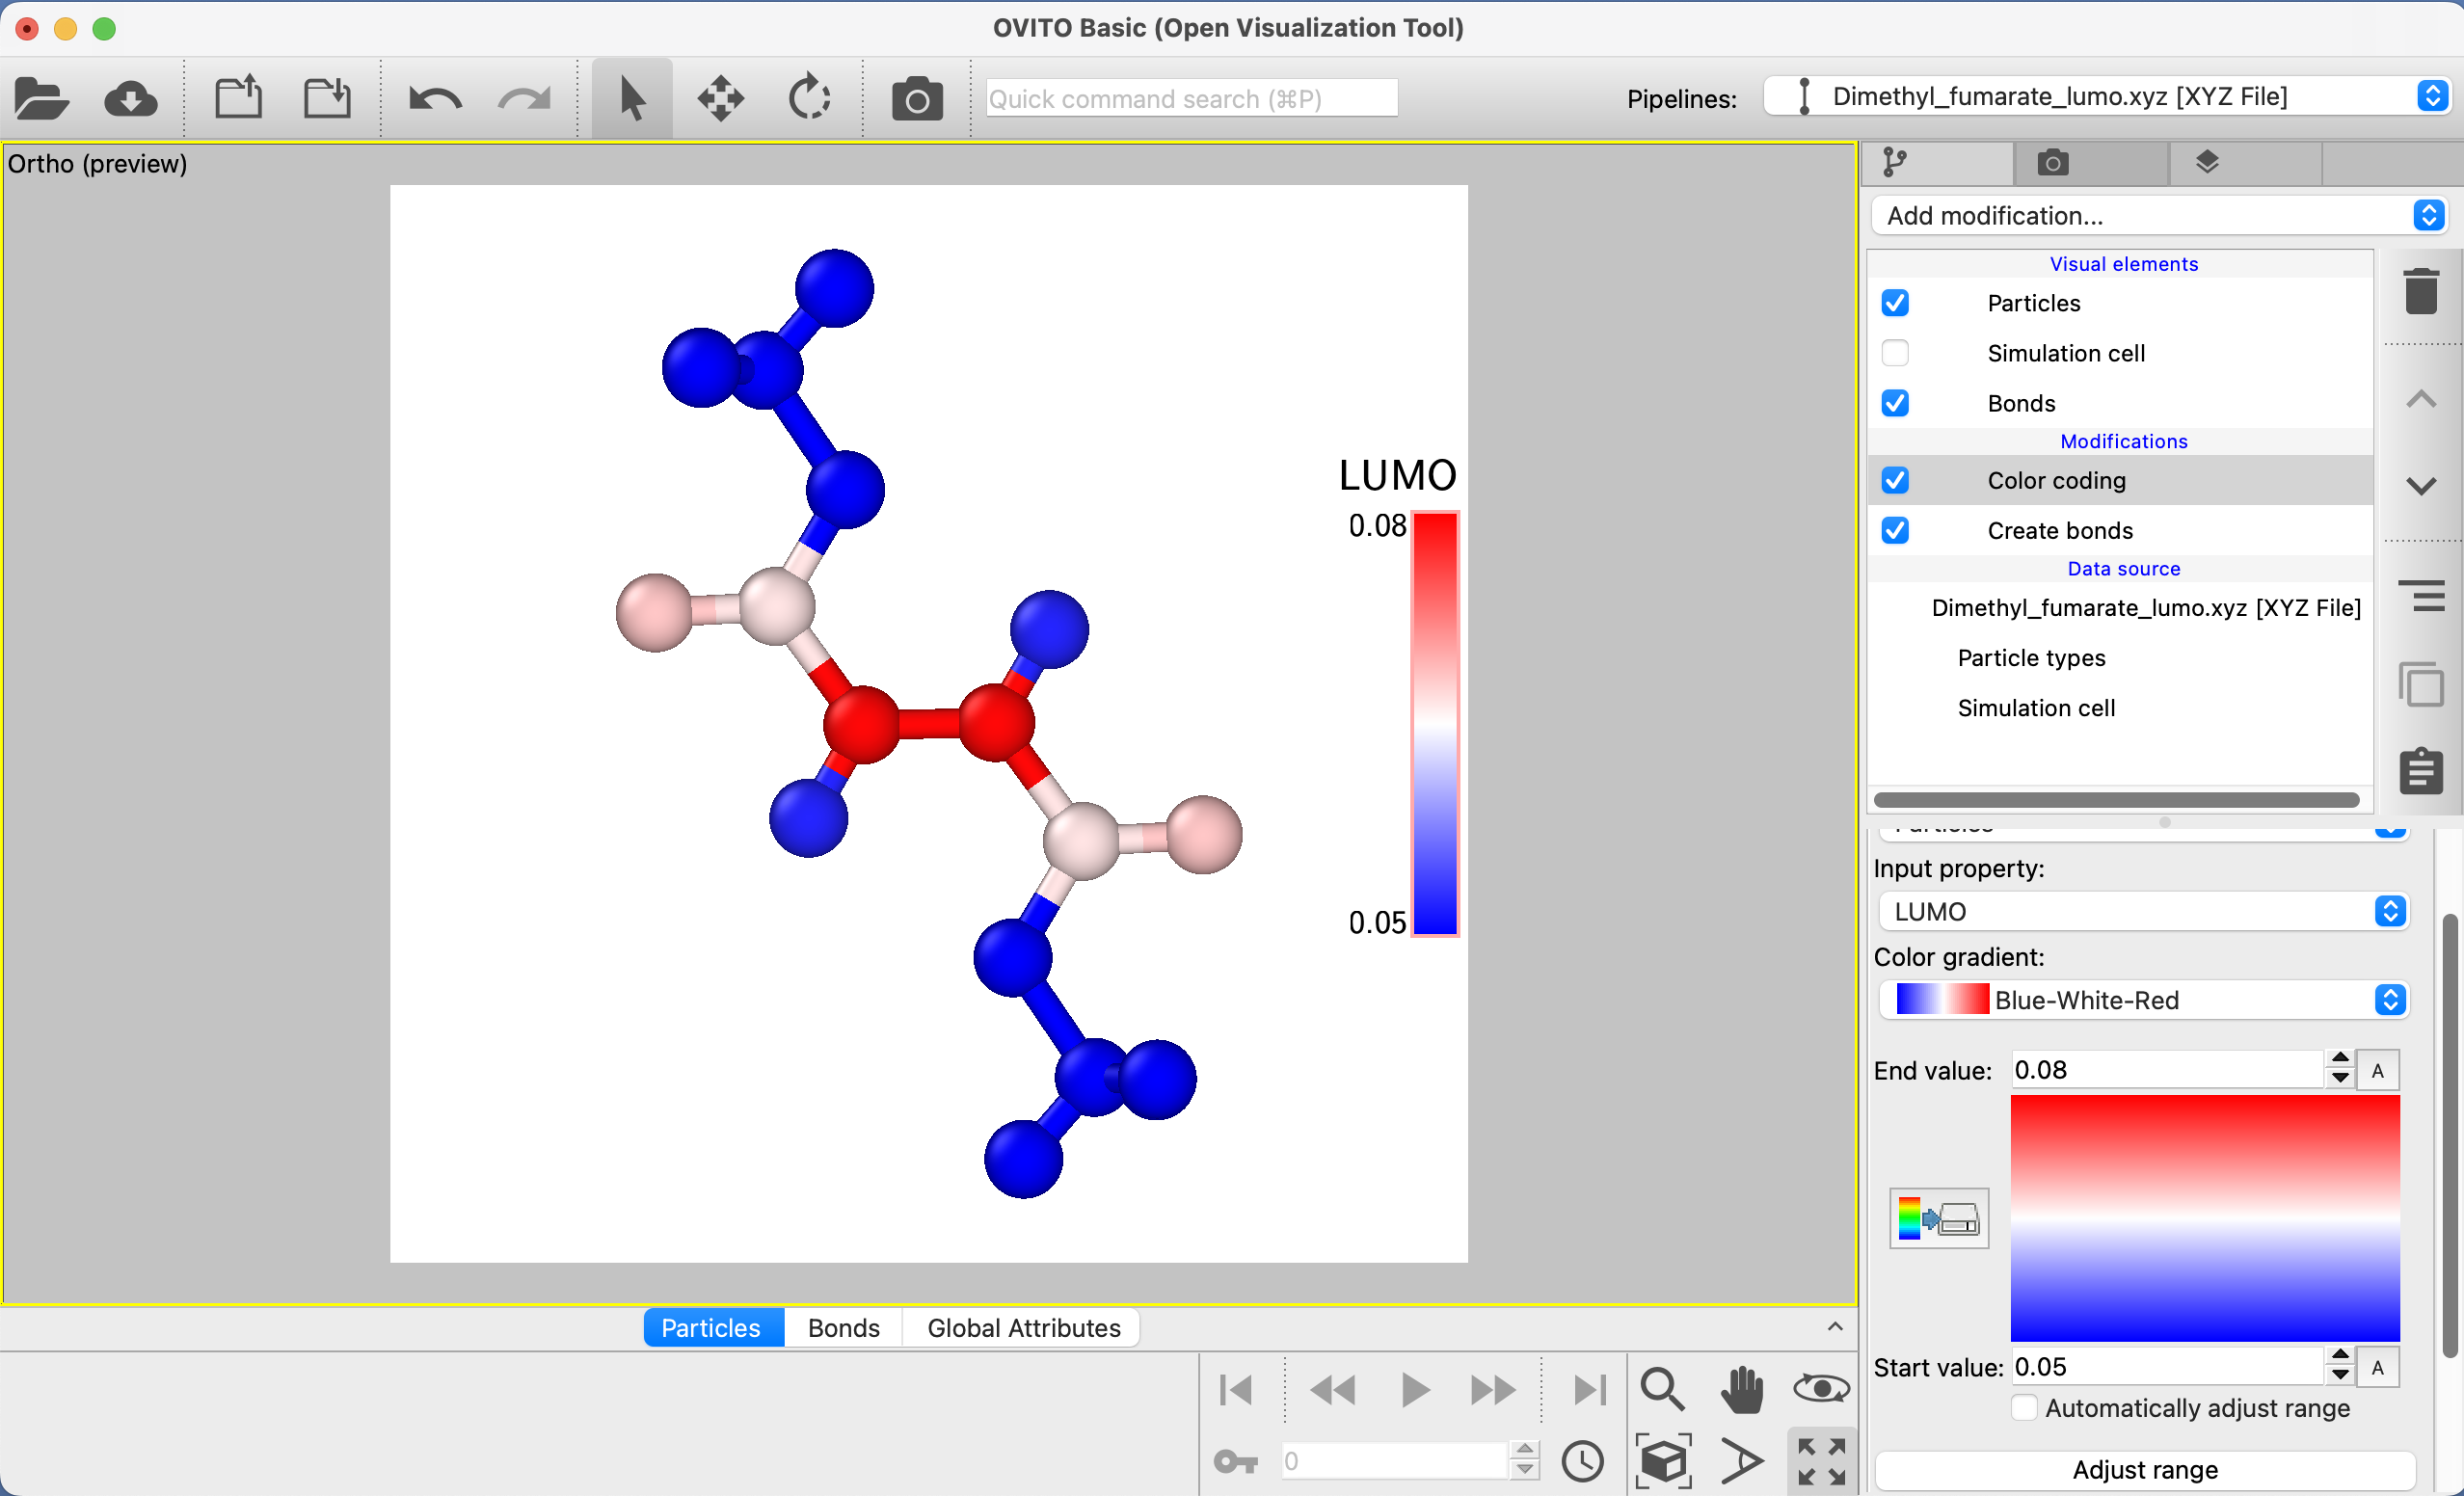

In [8]:
Image(filename='../visualize/Dimethyl_fumarate_lumo.png') 